#University of Bern: Module 3 Neural Network Project

## 4. CNN - Convolutional Neural Network / 3

###Importing the libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

###Download of the data from GitHub repository:

In [ ]:
# create a directory
#!mkdir brain_tumor_dataset
#!cd brain_tumor_dataset

# download the dataset
!wget https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip

# unzip the dataset and delete the zip
!unzip master.zip && rm master.zip

# concatenate the multiple zipped data in a single zip
#cat brainTumorDataPublic_* > brainTumorDataPublic_temp.zip
#zip -FF brainTumorDataPublic_temp.zip --out data.zip

# remove the temporary files
#rm brainTumorDataPublic_*

# unzip the full archive and delete it 
#unzip data.zip -d data && rm data.zip

--2021-03-07 16:35:20--  https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/master [following]
--2021-03-07 16:35:21--  https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [                 <=>]  86.97M  26.6MB/s    in 3.3s    

2021-03-07 16:35:24 (26.3 MB/s) - ‘master.zip’ saved [91198591]

Archive:  master.zip
3ea9f4eae54c67e5bddbf6f7a73582967a5f5f79
   creating: Brain-Tu

In [ ]:
# check that "master" contains 3264 files
!find /content/Brain-Tumor-Classification-DataSet-master -type f | wc -l

3264


### Setting up images parameters:

In [ ]:
img_height = 224
img_width = 224
convert_to_grayscale = True

### Feeding Training and Test data into list and arrays:

In [ ]:
#Feeding Training Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
train_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor"
train_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor"
train_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor"
train_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_train.append(img)
    y_train.append('Pituitary') 

100%|██████████| 827/827 [00:02<00:00, 291.43it/s]


In [ ]:
#Feeding Testing Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
test_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor"
test_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor"
test_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Testing/no_tumor"
test_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(img_height,img_width))
    if convert_to_grayscale:   
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert to grayscale
    X_test.append(img)
    y_test.append('Pituitary')  

100%|██████████| 74/74 [00:00<00:00, 161.97it/s]


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape,y_train.shape

((2870, 224, 224), (2870,))

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

((394, 224, 224), (394,))

### Normalization of images:

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0
if convert_to_grayscale:
    X_train = X_train.reshape(-1, img_height, img_width, 1)
    X_test = X_test.reshape(-1, img_height, img_width, 1)

print ('train: data shape', X_train.shape, 'label shape', y_train.shape)
print ('test: data shape', X_test.shape, 'label shape', y_test.shape)

train: data shape (2870, 224, 224, 1) label shape (2870,)
test: data shape (394, 224, 224, 1) label shape (394,)


### Labels encoding and categorisation:

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [ ]:
unique,counts = np.unique(y_train,return_counts=True)
print(unique,counts)

[0 1 2 3] [826 822 395 827]


In [ ]:
y_train

In [ ]:
y_train = to_categorical(y_train)  #num_classes = 4
y_train.shape

(2870, 4)

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [ ]:
y_test

In [ ]:
unique1,counts1 = np.unique(y_test,return_counts=True)
print(unique1,counts1)

[0 1 2 3] [100 115 105  74]


In [ ]:
y_test = to_categorical(y_test)#num_classes = 4
y_test.shape

(394, 4)

In [ ]:
y_test

### Training, Validation and Test dataset split:

In [ ]:
#X_train , X_test, y_train, y_test = train_test_split(X , y_enc , test_size = 0.1, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size = 0.1, random_state = 42)

### CNN model building:

In [ ]:
#from sklearn.metrics import confusion_matrix
#import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

ch = 3
if convert_to_grayscale:
  ch = 1

model = Sequential()

#tf.keras.layers.Flatten(input_shape=(128, 128,3))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape=(img_height,img_width,ch))) #, input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))  # Softmax
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))   #Softmax
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))    #Softmax
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))    #Softmax
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation = "softmax"))

optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
            # SGD(learning_rate=0.001, momentum=0.0, nesterov=True, name='SGD')
            # Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Nadam')
            # RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 35

es = EarlyStopping( 
    monitor='val_acc', 
    mode='max',
    patience = 3
)

batch_size = 16

imggen = ImageDataGenerator( 
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,   ## 40
        zoom_range = 0,     ## 0.2
        width_shift_range=0,  ## 0.2
        height_shift_range=0,  ## 0.2
        ##shear_range=0.2,        ## not set up previously
        horizontal_flip=True,  
        vertical_flip=False)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       1

### Model training:

In [ ]:
imggen.fit(X_train)

history = model.fit(imggen.flow(X_train,y_train,batch_size = batch_size, shuffle=True),
                                epochs = epochs, validation_data = (X_val,y_val),
                              steps_per_epoch = len(X_train) // batch_size,
                               callbacks = [es])   

Epoch 1/35
161/161 [==============================] - 45s 74ms/step - loss: 1.1995 - accuracy: 0.4529 - val_loss: 0.7161 - val_accuracy: 0.7073
Epoch 2/35
161/161 [==============================] - 9s 56ms/step - loss: 0.7970 - accuracy: 0.6496 - val_loss: 0.6123 - val_accuracy: 0.7178
Epoch 3/35
161/161 [==============================] - 9s 56ms/step - loss: 0.6440 - accuracy: 0.7270 - val_loss: 0.5493 - val_accuracy: 0.7944
Epoch 4/35
161/161 [==============================] - 9s 56ms/step - loss: 0.5480 - accuracy: 0.7779 - val_loss: 0.3822 - val_accuracy: 0.8571
Epoch 5/35
161/161 [==============================] - 9s 56ms/step - loss: 0.4421 - accuracy: 0.8316 - val_loss: 0.3965 - val_accuracy: 0.8293
Epoch 6/35
161/161 [==============================] - 9s 56ms/step - loss: 0.4179 - accuracy: 0.8231 - val_loss: 0.3614 - val_accuracy: 0.8676
Epoch 7/35
161/161 [==============================] - 9s 56ms/step - loss: 0.3448 - accuracy: 0.8528 - val_loss: 0.4861 - val_accuracy: 0.825

## Evaluation of the model:

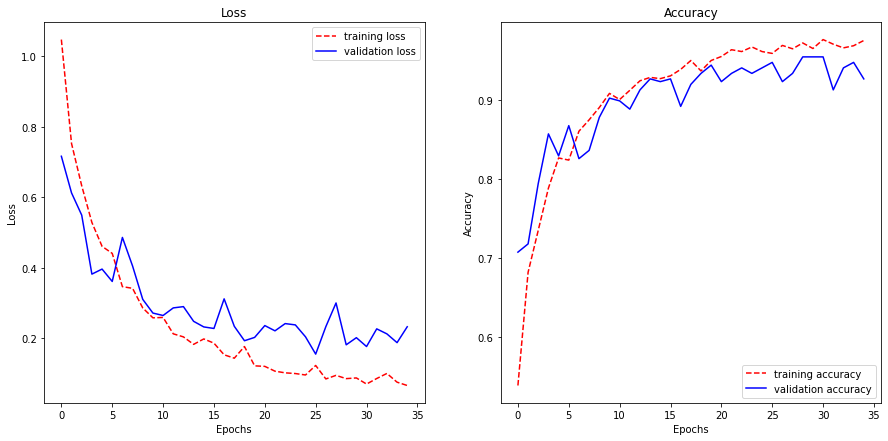

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(history.epoch, history.history['loss'], c = "red", linestyle='dashed')
axs[0].plot(history.epoch, history.history['val_loss'], c = "blue")
axs[0].legend(('training loss', 'validation loss'))#, loc='lower right')
axs[0].set_title("Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[1].plot(history.epoch, history.history['accuracy'], c = "red", linestyle='dashed')
axs[1].plot(history.epoch, history.history['val_accuracy'], c = "blue")
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
axs[1].set_title("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
plt.show()

## Predictions

In [ ]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0])

In [ ]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [ 26 154 155  59]


In [ ]:
model.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 1s 37ms/step - loss: 3.6546 - accuracy: 0.7335


[3.654602289199829, 0.7335025668144226]

## Classification report

In [ ]:
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
y_test_new.shape

(394,)

In [ ]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test_new, y_pred, labels=[0, 1, 2, 3], target_names=['Glioma','Meningioma','No tumor','Pituitary'])
print(clf_report)

              precision    recall  f1-score   support

      Glioma       0.88      0.23      0.37       100
  Meningioma       0.69      0.92      0.79       115
    No tumor       0.67      0.99      0.80       105
   Pituitary       0.95      0.76      0.84        74

    accuracy                           0.73       394
   macro avg       0.80      0.72      0.70       394
weighted avg       0.78      0.73      0.69       394



Remainder: 
- precision (p): true positive / (true positive + false positive)
- recall (r): true positive / (true positive + false negative)
- F1-score: harmonic mean combining p and r = 2 / (1/p + 1/r)

## Model Testing

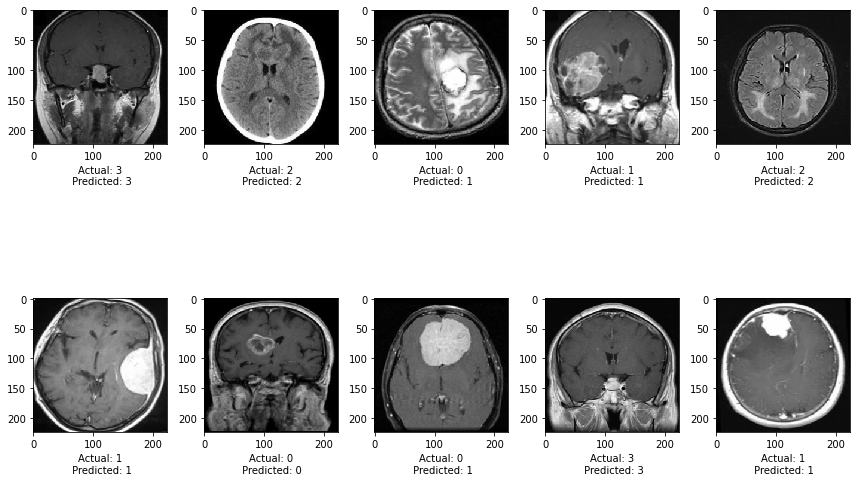

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = np.random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.reshape(-1, img_height, img_width)[sample_idx], cmap='gray', interpolation='nearest')
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

## Confusion Matrix

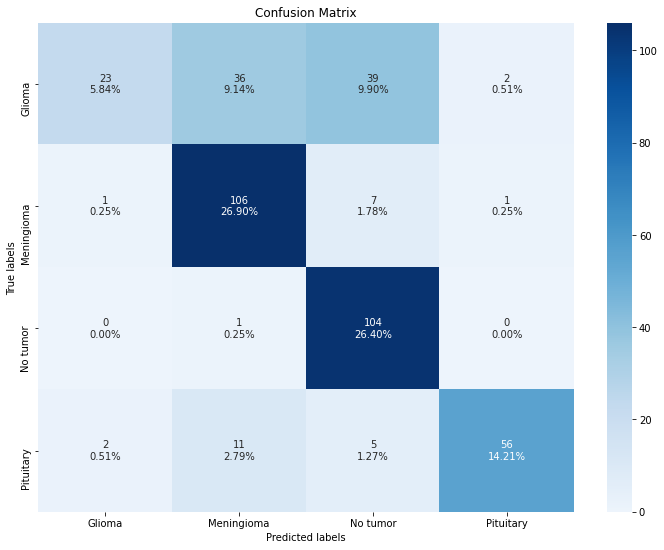

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)

plt.figure(figsize=(12,9))
ax= plt.subplot()
##group_names = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in  #   \n{v3}     v3
          zip(group_counts,group_percentages)]   # group_names,
labels = np.asarray(labels).reshape(4,4)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', center=50)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Glioma', 'Meningioma', 'No tumor', 'Pituitary'])
ax.yaxis.set_ticklabels(['Glioma', 'Meningioma', 'No tumor', 'Pituitary']);

#sns.heatmap(cm, annot=True, , ax = ax, cmap='Blues', center=50, fmt='g' ); #annot=True to annotate cells